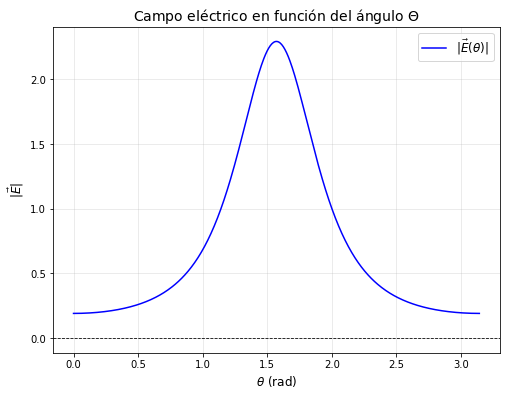

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Constantes
q = 1.0                # Carga (unidades arbitrarias)
v_c_ratio = 0.9        # Velocidad como fracción de la velocidad de la luz
c = 1.0                # Velocidad de la luz (normalizada)
R = 1.0                # Distancia al punto de observación (unidades arbitrarias)

# Definir rango de ángulos theta
theta = np.linspace(0, np.pi, 500)  # Ángulo en radianes

# Cálculo del campo eléctrico
numerator = 1 - v_c_ratio**2
denominator = (1 - v_c_ratio**2 * np.sin(theta)**2)**(3/2)
E_theta = (q / (R**2)) * (numerator / denominator)

# Graficar
plt.figure(figsize=(8, 6))
plt.plot(theta, E_theta, label=r"$|\vec{E}(\theta)|$", color='blue')
plt.title("Campo eléctrico en función del ángulo $\Theta$", fontsize=14)
plt.xlabel(r"$\theta$ (rad)", fontsize=12)
plt.ylabel(r"$|\vec{E}|$", fontsize=12)
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.grid(alpha=0.3)
plt.legend(fontsize=12)
plt.show()


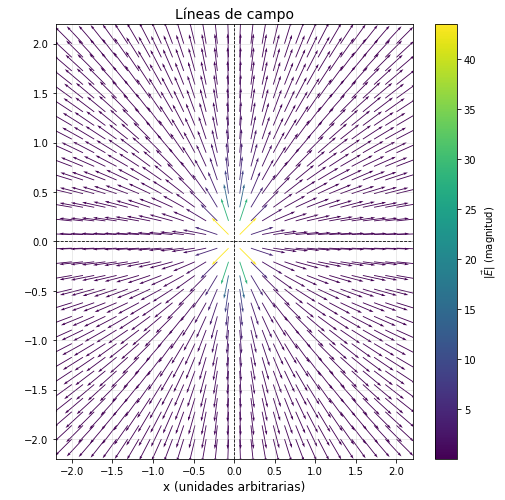

In [10]:
# Generar un grid para las posiciones (x, y)
x = np.linspace(-2, 2, 30)  # Rango en x
y = np.linspace(-2, 2, 30)  # Rango en y
X, Y = np.meshgrid(x, y)    # Crear una malla 2D

# Convertir coordenadas cartesianas a polares
R = np.sqrt(X**2 + Y**2)    # Magnitud del vector posición
theta = np.arctan2(Y, X)    # Ángulo polar

# Evitar la singularidad en el origen
R[R == 0] = 1e-6

# Cálculo del campo eléctrico en componentes cartesianas
numerator = 1 - v_c_ratio**2
denominator = (1 - v_c_ratio**2 * np.sin(theta)**2)**(3/2)
E_magnitude = (q / (R**2)) * (numerator / denominator)

# Componentes del campo eléctrico
E_x = E_magnitude * (X / R)  # Proyección en x
E_y = E_magnitude * (Y / R)  # Proyección en y

# Normalización para visualización (opcional)
E_x_norm = E_x / np.sqrt(E_x**2 + E_y**2)
E_y_norm = E_y / np.sqrt(E_x**2 + E_y**2)

# Graficar líneas de campo
plt.figure(figsize=(8, 8))
plt.quiver(X, Y, E_x_norm, E_y_norm, E_magnitude, scale=15, cmap='viridis')
plt.title("Líneas de campo", fontsize=14)
plt.xlabel("x (unidades arbitrarias)", fontsize=12)
plt.ylabel(" ", fontsize=12)
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')
plt.grid(alpha=0.3)
plt.colorbar(label=r"$|\vec{E}|$ (magnitud)")
plt.show()


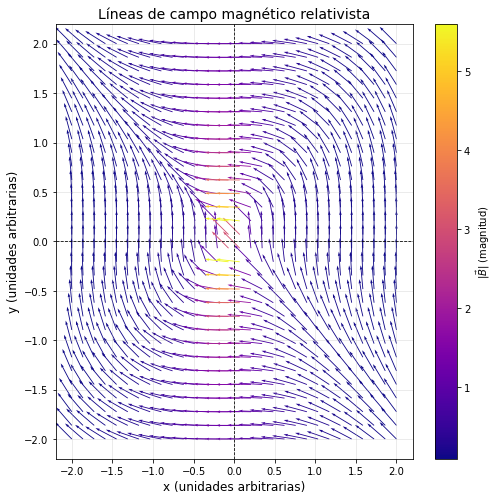

In [11]:
# Cálculo del campo magnético
# Producto cruzado r x E en componentes 2D (z componente es 0 para este problema)
B_x = (1 / c) * (-Y * E_y)  # Componente x del producto cruzado
B_y = (1 / c) * (X * E_x)   # Componente y del producto cruzado

# Normalización para visualización
B_x_norm = B_x / np.sqrt(B_x**2 + B_y**2)
B_y_norm = B_y / np.sqrt(B_x**2 + B_y**2)

# Graficar líneas de campo magnético
plt.figure(figsize=(8, 8))
plt.quiver(X, Y, B_x_norm, B_y_norm, np.sqrt(B_x**2 + B_y**2), scale=15, cmap='plasma')
plt.title("Líneas de campo magnético relativista", fontsize=14)
plt.xlabel("x (unidades arbitrarias)", fontsize=12)
plt.ylabel("y (unidades arbitrarias)", fontsize=12)
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')
plt.grid(alpha=0.3)
plt.colorbar(label=r"$|\vec{B}|$ (magnitud)")
plt.show()


C:\Users\sebas\AppData\Local\Temp/ipykernel_19876/3452424858.py:33: RuntimeWarning: invalid value encountered in divide
  B_x_norm = B_x / B_magnitude
C:\Users\sebas\AppData\Local\Temp/ipykernel_19876/3452424858.py:34: RuntimeWarning: invalid value encountered in divide
  B_y_norm = B_y / B_magnitude
C:\Users\sebas\AppData\Local\Temp/ipykernel_19876/3452424858.py:35: RuntimeWarning: invalid value encountered in divide
  B_z_norm = B_z / B_magnitude


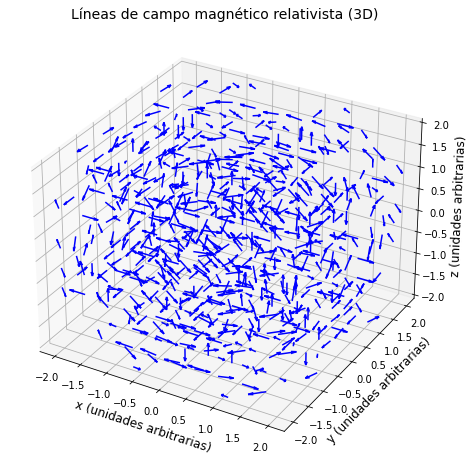

In [12]:
from mpl_toolkits.mplot3d import Axes3D

# Generar un grid 3D para las posiciones (x, y, z)
x = np.linspace(-2, 2, 10)  # Rango en x
y = np.linspace(-2, 2, 10)  # Rango en y
z = np.linspace(-2, 2, 10)  # Rango en z
X, Y, Z = np.meshgrid(x, y, z)  # Crear malla 3D

# Calcular la magnitud de r y evitar la singularidad en el origen
R = np.sqrt(X**2 + Y**2 + Z**2)
R[R == 0] = 1e-6

# Calcular el campo eléctrico en 3D
theta = np.arccos(Z / R)  # Ángulo polar
phi = np.arctan2(Y, X)    # Ángulo azimutal

# Campo eléctrico
numerator = 1 - v_c_ratio**2
denominator = (1 - v_c_ratio**2 * np.sin(theta)**2)**(3/2)
E_magnitude = (q / (R**2)) * (numerator / denominator)

E_x = E_magnitude * (X / R)
E_y = E_magnitude * (Y / R)
E_z = E_magnitude * (Z / R)

# Calcular el campo magnético B = (1/c) * (r x E)
B_x = (1 / c) * (Y * E_z - Z * E_y)
B_y = (1 / c) * (Z * E_x - X * E_z)
B_z = (1 / c) * (X * E_y - Y * E_x)

# Normalizar para visualización
B_magnitude = np.sqrt(B_x**2 + B_y**2 + B_z**2)
B_x_norm = B_x / B_magnitude
B_y_norm = B_y / B_magnitude
B_z_norm = B_z / B_magnitude

# Graficar líneas de campo magnético en 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Dibujar vectores del campo magnético
ax.quiver(X, Y, Z, B_x_norm, B_y_norm, B_z_norm, length=0.3, normalize=True, color='blue')

# Etiquetas y formato
ax.set_title("Líneas de campo magnético relativista (3D)", fontsize=14)
ax.set_xlabel("x (unidades arbitrarias)", fontsize=12)
ax.set_ylabel("y (unidades arbitrarias)", fontsize=12)
ax.set_zlabel("z (unidades arbitrarias)", fontsize=12)
plt.show()
